In [1]:
import tensorflow as tf 
if tf.test.gpu_device_name(): 
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

else:
   print("Please install GPU version of TF")

Please install GPU version of TF


In [2]:
!pip install psycopg2-binary
!pip install sklearn
!pip install pandas
!pip install pywavelets

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import psycopg2
import pandas as pds
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os

In [4]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

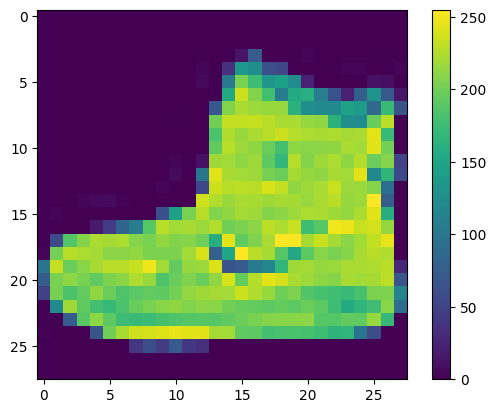

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

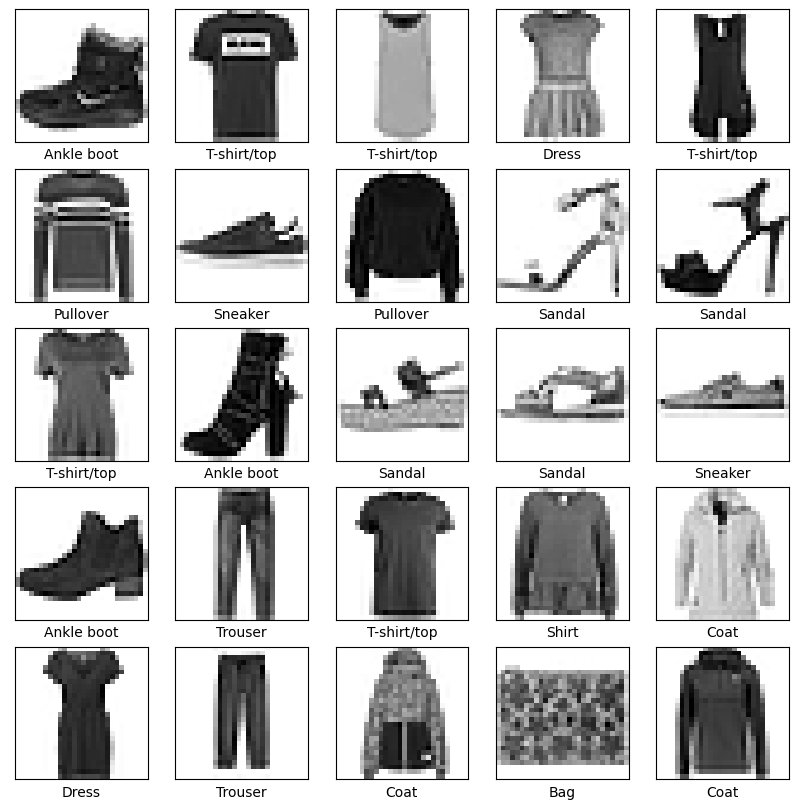

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [65]:
f = open("flat.data", "w")
for i in range(0, len(train_labels)):
    x = ",".join(str(v) for v in np.concatenate(train_images[i]))
    x += "," + str(train_labels[i])
    f.write(x + "\n")
f.close()

f = open("flat.test", "w")
for i in range(0, len(test_labels)):
    x = ",".join(str(v) for v in np.concatenate(test_images[i]))
    x += "," + str(test_labels[i])
    f.write(x + "\n")
f.close()

f = open("flat.names", "w")
f.write("| names file\n\n")
f.write("target.\n\n")
for i in range(0, len(np.concatenate(train_images[0]))):
    f.write("feature" + str(i) + ": continuous.\n")
f.write("target: 0,1,2,3,4,5,6,7,8,9.\n") 
f.close()

In [15]:
import pywt

In [26]:
print(len(pywt.dwt2([[1, 0, 0],[0, 1, 0],[0, 1, 0]], 'haar')))
print(pywt.dwt2([[1, 0, 0],[0, 1, 0],[0, 1, 0]], 'haar'))

2
(array([[1., 0.],
       [1., 0.]]), (array([[0., 0.],
       [0., 0.]]), array([[ 0.,  0.],
       [-1.,  0.]]), array([[1., 0.],
       [0., 0.]])))


In [28]:
print(len(pywt.wavedec2([[1, 0, 0, 0],[0, 1, 0, 0],[0, 1, 0, 0],[0, 0, 0, 1]], 'haar')))
print(pywt.wavedec2([[1, 0, 0, 0],[0, 1, 0, 0],[0, 1, 0, 0],[0, 0, 0, 1]], 'haar'))

3
[array([[1.]]), (array([[0.]]), array([[0.5]]), array([[0.5]])), (array([[ 0. ,  0. ],
       [ 0.5, -0.5]]), array([[ 0. ,  0. ],
       [-0.5, -0.5]]), array([[ 1. ,  0. ],
       [-0.5,  0.5]]))]


In [64]:
def make_flat(x):
    while(len(np.shape(x))>1):
        x = np.concatenate(x)
    return x

vwlet = []
for x in pywt.wavedec2(train_images[i], 'haar'):
    x = make_flat(x)
    vwlet.append(x)
vwlet = np.concatenate(vwlet)

print(np.shape(vwlet))


(799,)


In [ ]:
f = open("vwlet.data", "w")
for i in range(0, len(train_labels)):
    vwlet = []
    for x in pywt.wavedec2(train_images[i], 'haar'):
        x = make_flat(x)
        vwlet.append(x)
    vwlet = np.concatenate(vwlet)    
    x = ",".join(str(round(v,5)) for v in vwlet)
    x += "," + str(train_labels[i])
    f.write(x + "\n")
f.close()

f = open("vwlet.test", "w")
for i in range(0, len(test_labels)):
    vwlet = []
    for x in pywt.wavedec2(test_images[i], 'haar'):
        x = make_flat(x)
        vwlet.append(x)
    vwlet = np.concatenate(vwlet)    
    x = ",".join(str(round(v,5)) for v in vwlet)
    x += "," + str(test_labels[i])
    f.write(x + "\n")
f.close()

f = open("vwlet.names", "w")
f.write("| names file\n\n")
f.write("target.\n\n")
for i in range(0, len(np.concatenate(train_images[0]))):
    f.write("feature" + str(i) + ": continuous.\n")
f.write("target: 0,1,2,3,4,5,6,7,8,9.\n") 
f.close()